In [1]:
import numpy as np  
import matplotlib.pyplot as plt 
import scipy.signal as sp
import numpy.linalg as nplin
from gekko import GEKKO

from scipy.integrate import odeint
from scipy.interpolate import interp1d
from scipy.signal import place_poles
from scipy.signal import find_peaks
from scipy.linalg import solve_continuous_are


from plotfunc import plot_sets

### 2 


In [10]:
def t_model(y0,t):
    dy = t**2
    return dy

t = np.arange(0,10,0.01)

res = odeint(t_model,0,t)

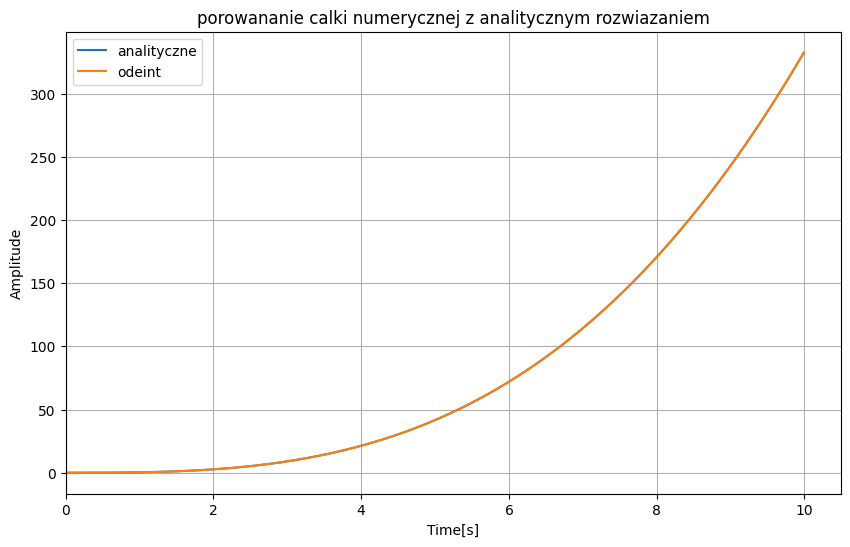

In [11]:
res_analitical = 1/3 * t**3 

plot_sets('porowananie calki numerycznej z analitycznym rozwiazaniem',[t,res_analitical,'analityczne'],[t,res,'odeint'])

Pokrywaja sie pozdro 


### 3 


In [14]:
def model_non_linear(x,t):
    kp=2
    omega= 4 
    xi=0.25
    u=1 

    y = x[0]
    dydt = x[1]
    dy2dt2 = -2*xi/omega * dydt - 1/omega * np.sqrt(y)+kp/omega**2 * u
    return [dydt,dy2dt2]

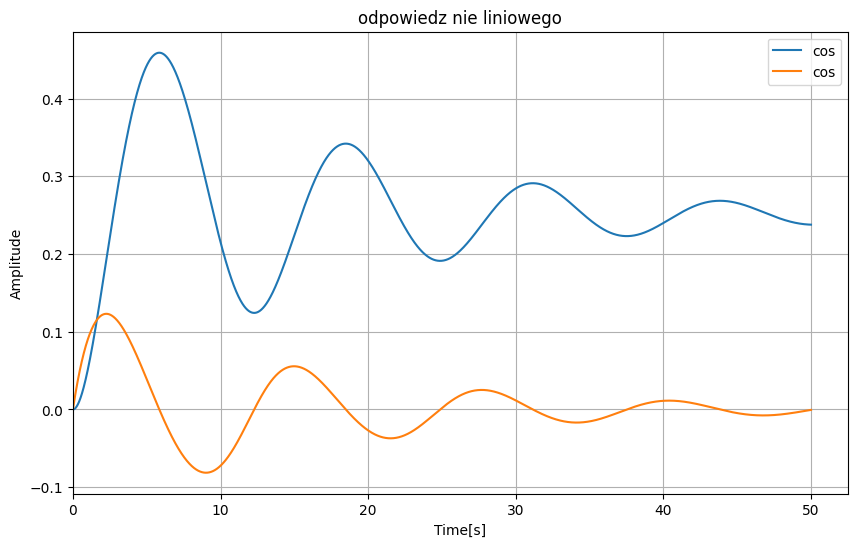

In [18]:
t= np.arange(0,50,0.01)

res=odeint(model_non_linear,[0,0],t)

plot_sets("odpowiedz nie liniowego",[t,res,'cos'])

### 4


In [ ]:
def feedback(y0,t,xd):
    kp = 2
    T = 2
    kob = 4
    limit = 0.1

    u = kp* (xd - y0)

    uc = np.clip(u, -limit, limit)

    dy = (kob * uc -y0)/T
    return dy

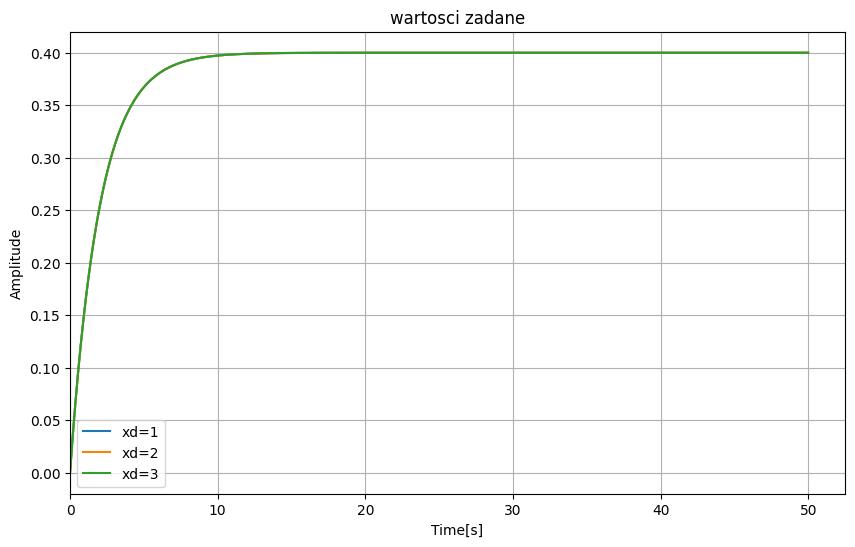

In [27]:
t = np.arange(0,50,0.01)

y0 = 0 

res1 = odeint(feedback, y0, t, args=(1,))
res2 = odeint(feedback, y0, t, args=(2,))
res3 = odeint(feedback, y0, t, args=(3,))

plot_sets('wartosci zadane',[t,res1,'xd=1'],[t,res2,'xd=2'],[t,res3,'xd=3'])


### 5

In [32]:
m = 0.5      
l = 1.0      
d = 0.5      
g = 10.0     
J = m * R**2

A = 1.5
omega_drive = 0.65

def model_pendulum(x,t):
    x1 = x[0]
    x2 = x[1]

    tau_m = A * np.cos(omega_drive * t)

    dx1= x2
    dx2 = (1/J)*tau_m - d/J * x2 - (m*g*l/J)*np.sin(x1)
 
    return [dx1,dx2]

(5000, 2)


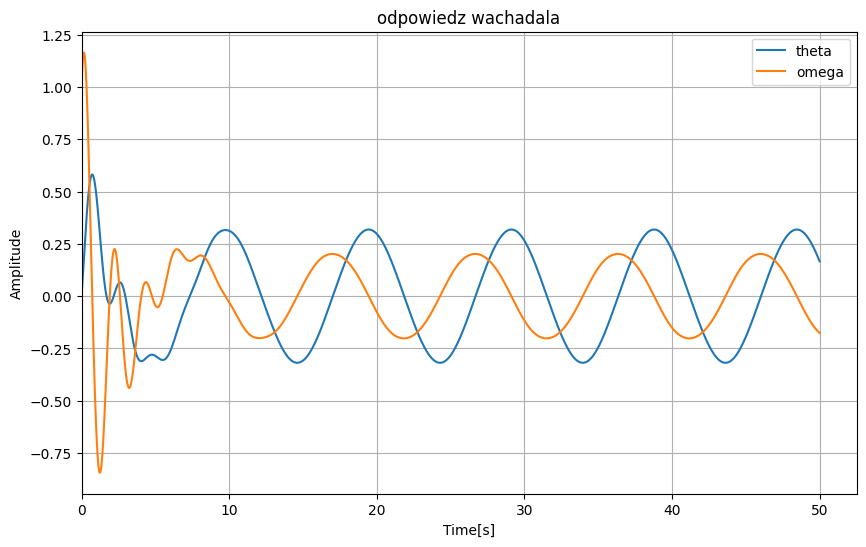

In [42]:
t = np.arange(0,50,0.01)

y0 = [0,1]

res_pen = odeint(model_pendulum,y0,t)

print(res_pen.shape)

plot_sets('odpowiedz wachadala',[t,res_pen[:,0],'theta'],[t,res_pen[:,1],'omega'])